In [13]:
import torch
import math
import torch.optim as optim
from torch.nn import Module, Linear, ReLU, BCELoss, Softmax, Parameter, MSELoss
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss')

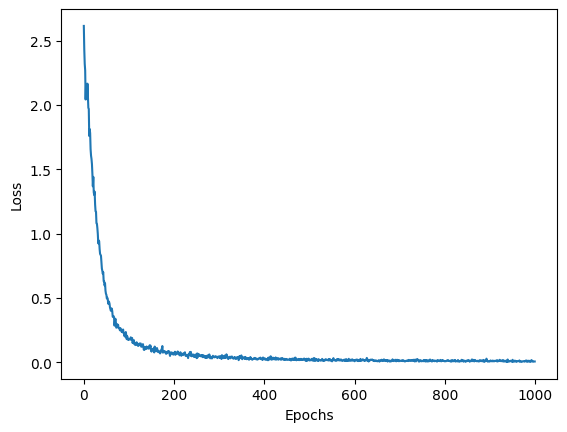

In [14]:
# class MLP(Module):
#     def __init__(self):
#         super().__init__()
#         self.l1_layer = Linear(3, 5, False)
#         self.l1_activation = ReLU()

#         # Hidden Layer
#         self.l2_layer = Linear(5, 10, False)
#         self.l2_activation = ReLU()

#         # Output Layer
#         self.l3_layer = Linear(10, 2, False)
#         self.l3_activation = Softmax()
                
    # def forward(self, batch_tensors):
    #     y = self.l1_activation(self.l1_layer(batch_tensors))
    #     # print(f"First Layer Activations: {y}")
    #     y = self.l2_activation(self.l2_layer(y))
    #     # print(f"Second Layer Activations: {y}")
    #     y = self.l3_activation(self.l3_layer(y))
    #     # print(f"Third Layer Activations: {y}")
    #     return y

# Using direct matrix multiplication
class MLP(Module):
    def __init__(self):
        super().__init__()
        self.l1_layer = Parameter(torch.rand(3, 5))
        self.l1_activation = ReLU()

        self.l2_layer = Parameter(torch.rand(5, 10))
        self.l2_activation = ReLU()

        self.l3_layer = Parameter(torch.rand(10, 2))
        self.l3_activation = Softmax(dim=-1)

    def forward(self, batch_tensors):
        y = batch_tensors @ self.l1_layer
        y = self.l1_activation(y)

        y = y @ self.l2_layer
        y = self.l2_activation(y)

        y = y @ self.l3_layer
        y = self.l3_activation(y)

        return y


model = MLP()
loss_function = BCELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
losses = []
batch_size = 64

for _ in range(1000):
    input = torch.rand(batch_size, 3)
    output = model(input)
    label = torch.Tensor([[0, 1]] * batch_size)
    loss = loss_function(output, label)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    losses.append(loss.item())

fig = sns.lineplot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")

/Users/kyle/miniconda3/envs/llm-tta/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([512])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Text(0, 0.5, 'Loss')

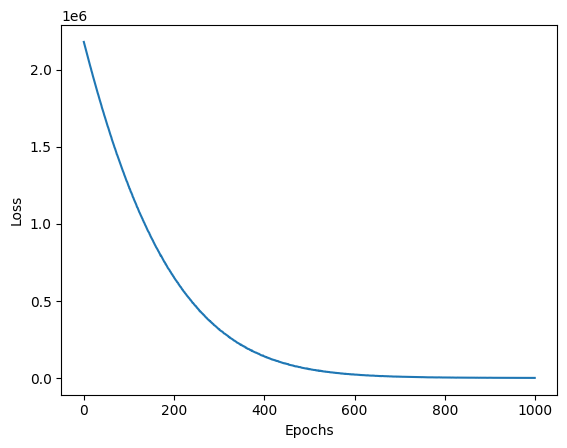

In [16]:
class LinearRegression(Module):
    def __init__(self):
        super().__init__()
        self.weights = Parameter(torch.rand(768))
        self.bias = Parameter(torch.rand(1))
    
    def forward(self, input_batch):
        weighted_sum = input_batch @ self.weights
        with_bias = weighted_sum + self.bias
        return with_bias


losses = []
loss_function = MSELoss()
model = LinearRegression()
optimizer = optim.AdamW(model.parameters(), lr=1e-2)

for _ in range(1000):
    # Get pred
    input_tensor = torch.rand(512, 768)
    prediction = model(input_tensor)

    # Optimize
    label = torch.Tensor([1668])
    loss = loss_function(prediction, label)
    loss.backward()
    optimizer.step()

    # Prep for next batch
    optimizer.zero_grad()
    losses.append(loss.item())

fig = sns.lineplot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")